In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os


#Import the Labraries for visualision 
import matplotlib.pyplot as plt
import seaborn as sns
pulsar_data=pd.read_csv("pulsar_stars.csv")
pulsar_data.head(10)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


Data Set

In [19]:
pulsar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


To check missing value in our dataset

In [21]:
pulsar_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Target Variable

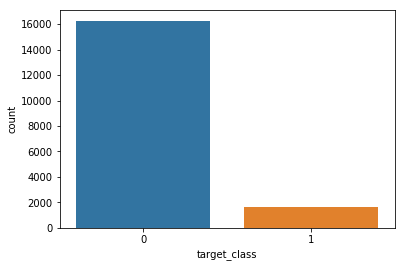

In [23]:
sns.countplot(x ='target_class', data =pulsar_data)
plt.show()

To see the correlation by plotting heatmap

Text(0.5, 1.05, 'Correlation of pulsar_stars Features')

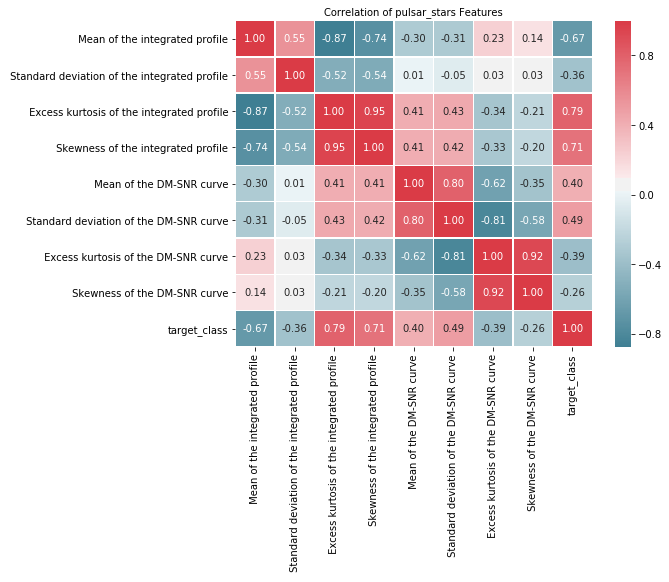

In [44]:

corr = pulsar_data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
            cmap = colormap, linecolor='white')
plt.title('Correlation of pulsar_stars Features', y = 1.05, size=10)

In [29]:
print (corr['target_class'].sort_values(ascending=False))

target_class                                     1.000000
 Excess kurtosis of the integrated profile       0.791591
 Skewness of the integrated profile              0.709528
 Standard deviation of the DM-SNR curve          0.491535
 Mean of the DM-SNR curve                        0.400876
 Skewness of the DM-SNR curve                   -0.259117
 Standard deviation of the integrated profile   -0.363708
 Excess kurtosis of the DM-SNR curve            -0.390816
 Mean of the integrated profile                 -0.673181
Name: target_class, dtype: float64


Pair plot between all variables

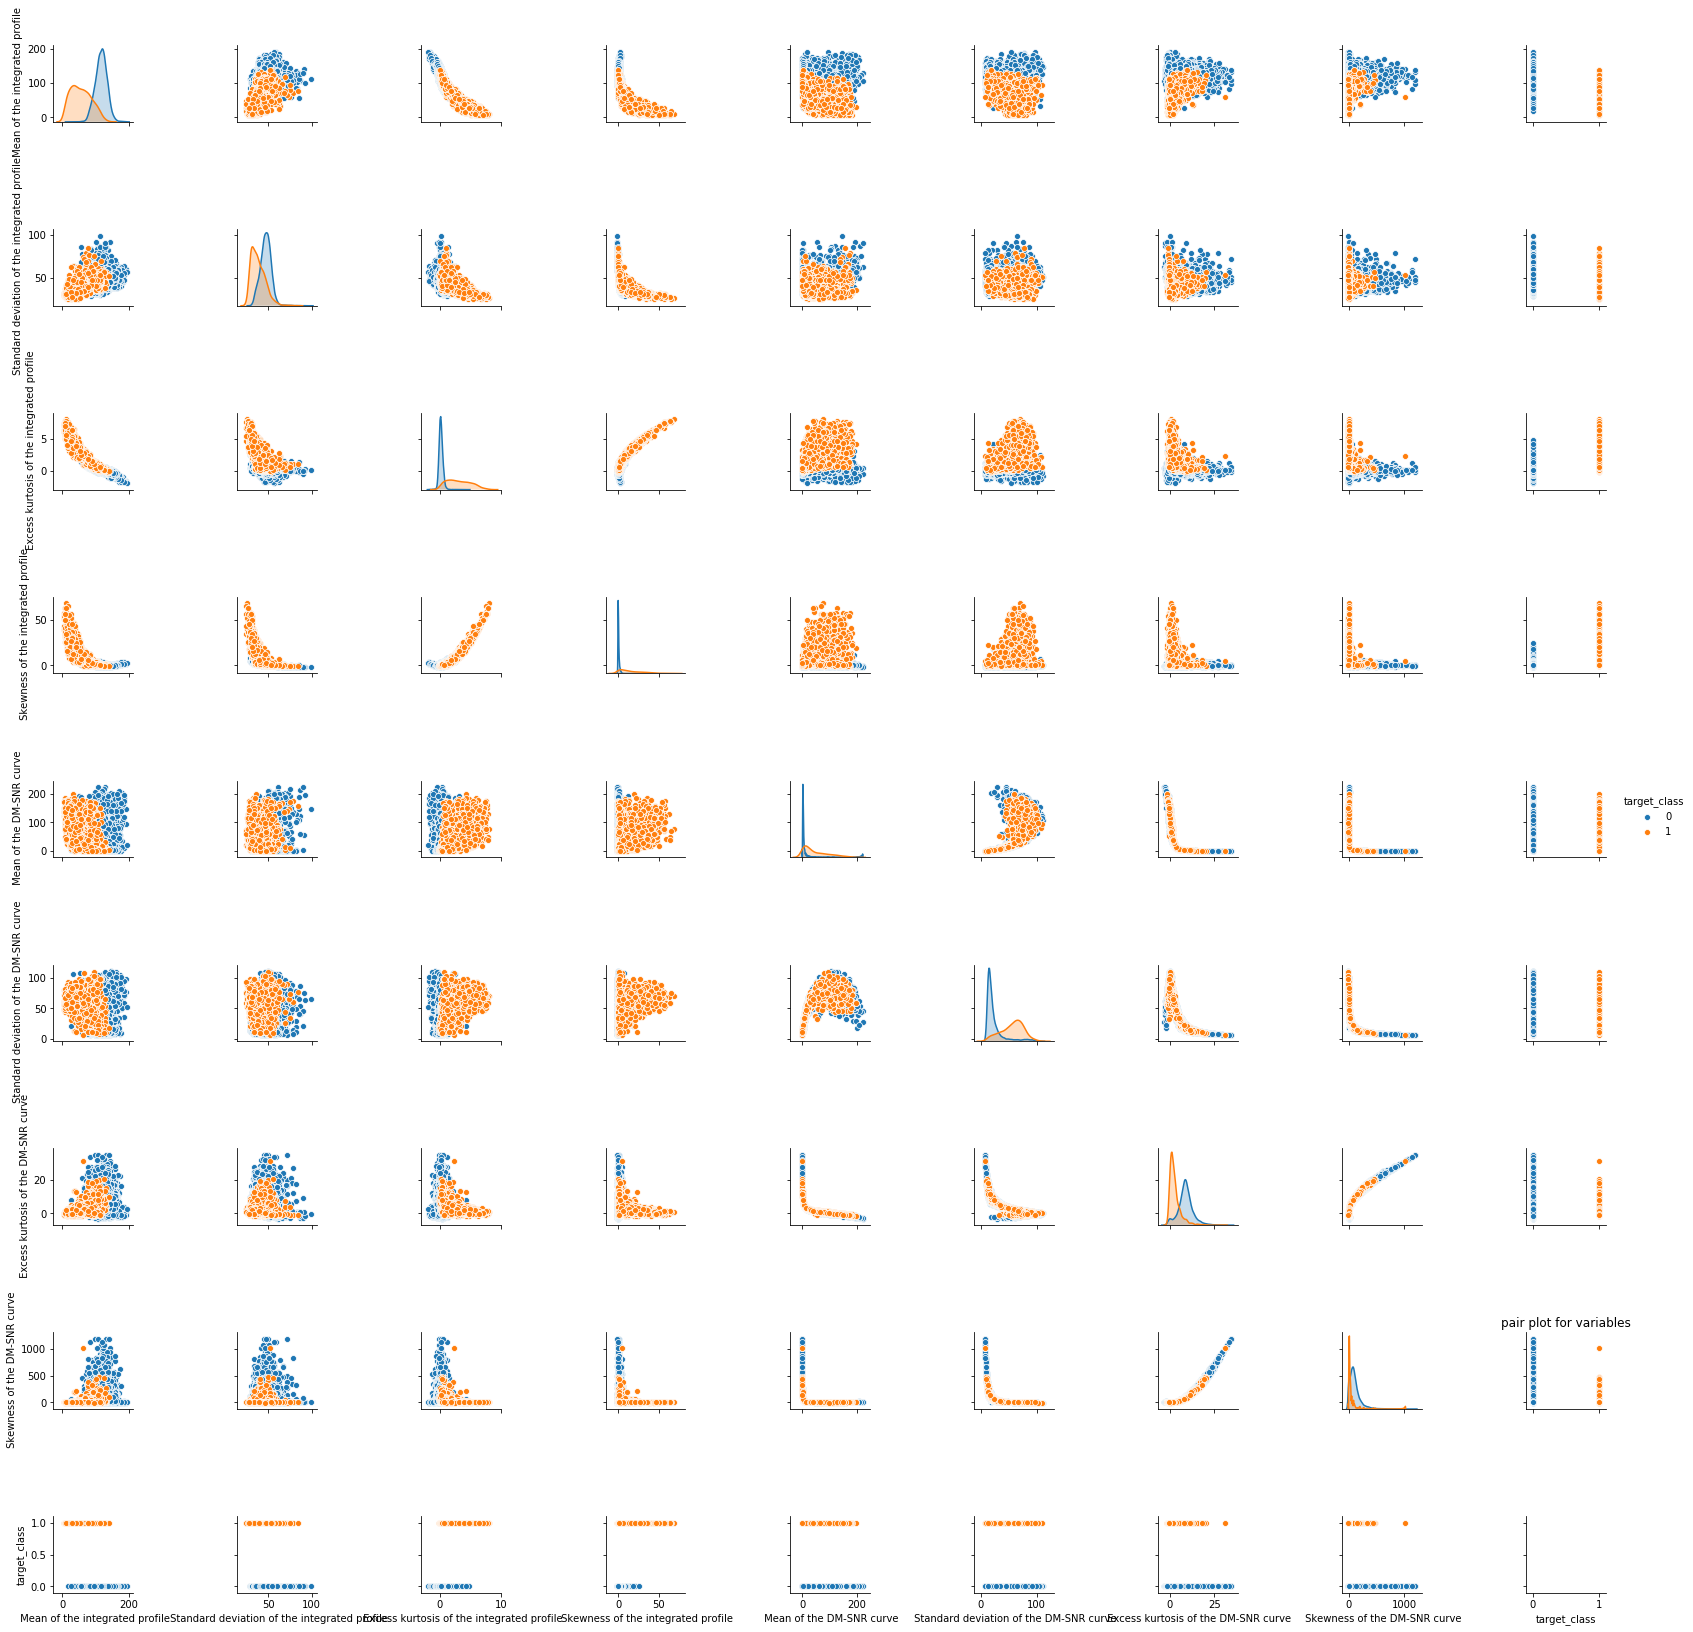

In [45]:
sns.pairplot(pulsar_data,hue = 'target_class')
plt.title("pair plot for variables")
plt.show()


Create of ML Model

In [34]:
x = pulsar_data.iloc[:, 0 : 8].values
y = pulsar_data.iloc[:, - 1].values

Dataset to the traning and test set

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Feature Secaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logistic Regression to the training set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\NAYANA.S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the test set result

In [38]:
y_pred = classifier.predict(x_test)

Making the Confussion Matrix and Print Accuracy

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9816759776536312
[[4094   21]
 [  61  299]]


Receiver Operating characteristic [ROC]

AUC : 0.913


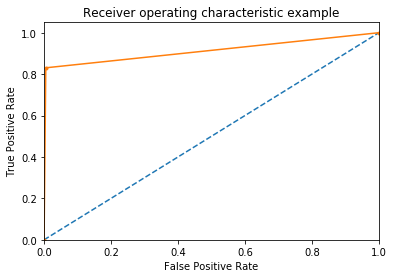

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC : %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker = '.')
plt.show()